In [287]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [288]:
df = pd.read_csv('911.csv')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [290]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [291]:
# what are the top 5 zipcodes for 911 calls?

df.zip.value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [292]:
# What are the top 5 townships (twp) for 911 calls?

df.twp.value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [293]:
# Take a look at the 'title' column,
# how many unique title codes are there?

df.title.nunique()

110

In [294]:
df.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [295]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

# For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

df['Reason'] = df.title.apply(lambda title: title.split(':')[0])

In [296]:
# What is the most common Reason for a 911 call based off of this new column?

df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

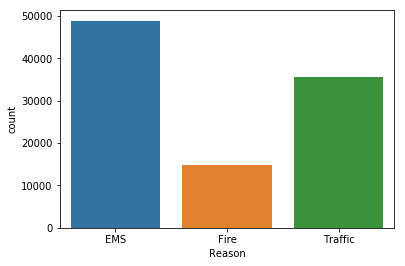

In [297]:
# Now use seaborn to create a countplot of 911 calls by Reason.

sns.countplot(x ='Reason', data=df)

In [298]:
# Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

type(df.timeStamp[0])

str

In [299]:
#  You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects.

df.timeStamp = pd.to_datetime(df.timeStamp)
type(df.timeStamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [300]:
# You can now grab specific attributes from a Datetime object by calling them. For example

time = df.timeStamp.iloc[0]
time.hour

17

You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.

In [301]:
df['Hour'] = df.timeStamp.apply(lambda x: x.hour)
df['Month'] = df.timeStamp.apply(lambda x: x.month)
df['DayofWeek'] = df.timeStamp.apply(lambda x: x.dayofweek)

In [302]:
df.DayofWeek.head()

0    3
1    3
2    3
3    3
4    3
Name: DayofWeek, dtype: int64

In [303]:
# Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df.DayofWeek = df.DayofWeek.map(dmap)

In [304]:
df.DayofWeek.head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: DayofWeek, dtype: object

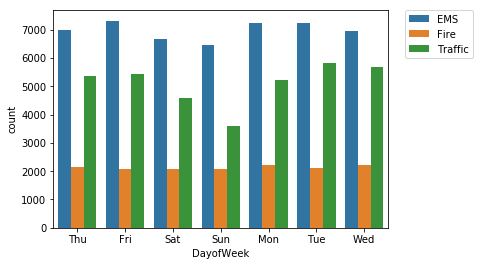

In [305]:
# Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

sns.countplot(x='DayofWeek',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

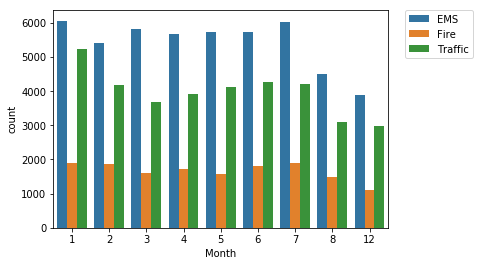

In [306]:
# Now do the same for Month:

sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [307]:
# missing months 9, 10, 11

In [308]:
#  Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation
# Use the head() method on this returned DataFrame

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayofWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


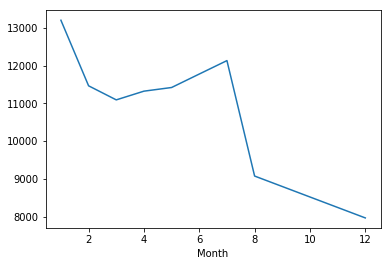

In [309]:
# Now create a simple plot off of the dataframe indicating the count of calls per month

byMonth.twp.plot()

 Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



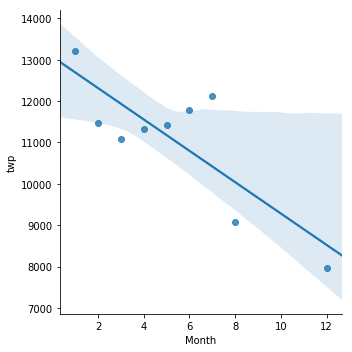

In [310]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [311]:
# Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. 

df['Date'] = df.timeStamp.apply(lambda x: x.date())

In [312]:
df.Date.head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

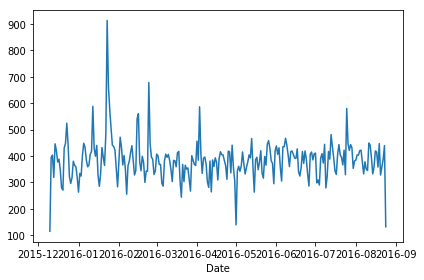

In [313]:
df.groupby('Date').count().twp.plot()
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

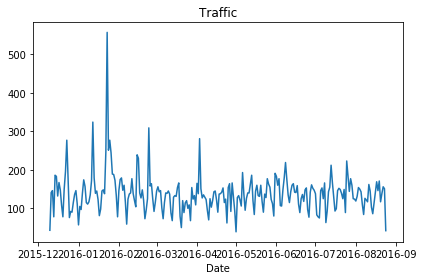

In [314]:
df[df.Reason == 'Traffic'].groupby('Date').count().twp.plot()
plt.title('Traffic')
plt.tight_layout()

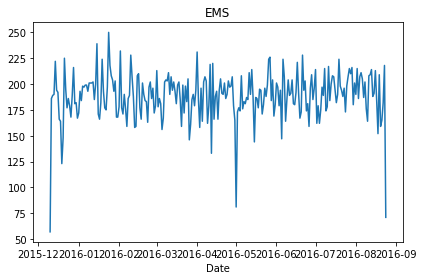

In [315]:
df[df.Reason == 'EMS'].groupby('Date').count().twp.plot()
plt.title('EMS')
plt.tight_layout()

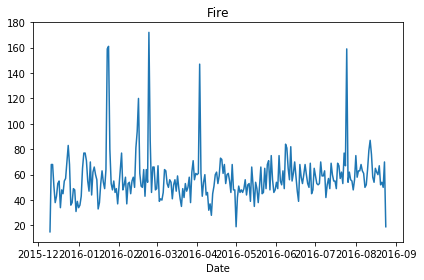

In [316]:
df[df.Reason == 'Fire'].groupby('Date').count().twp.plot()
plt.title('Fire')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this

In [318]:
dayHour = df.groupby(by=['DayofWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


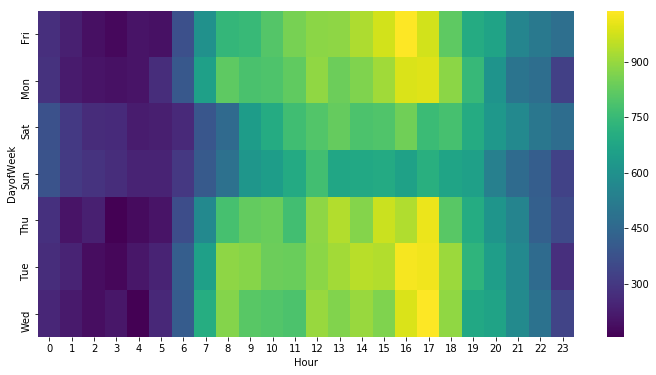

In [321]:
# Now create a HeatMap using this new DataFrame

plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

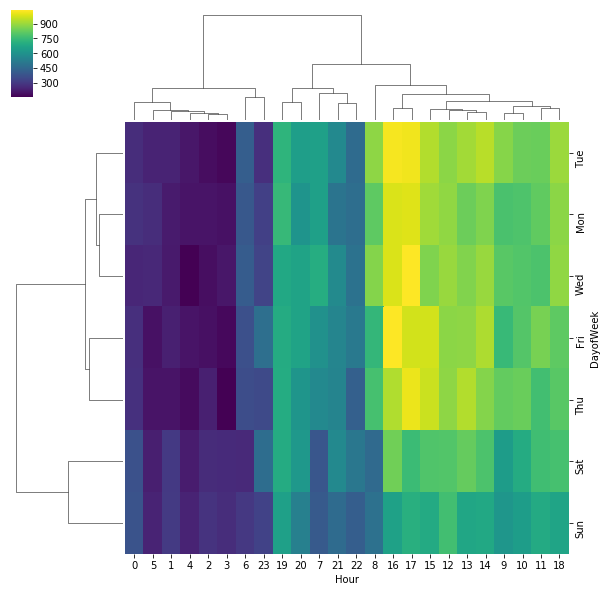

In [322]:
# Now create a clustermap using this DataFrame

sns.clustermap(dayHour,cmap='viridis')

Now repeat these same plots and operations, for a DataFrame that shows the Month as the column

In [324]:
dayMonth = df.groupby(by=['DayofWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayofWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


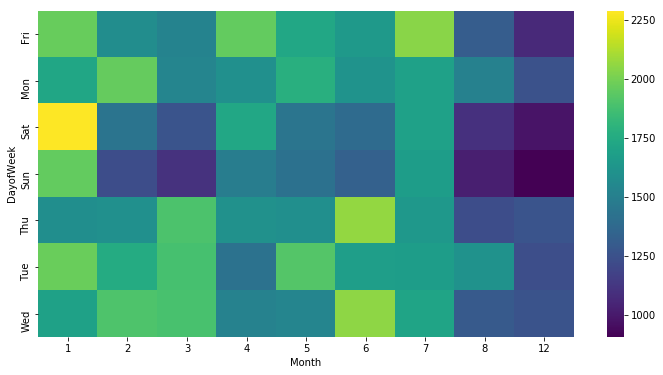

In [325]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

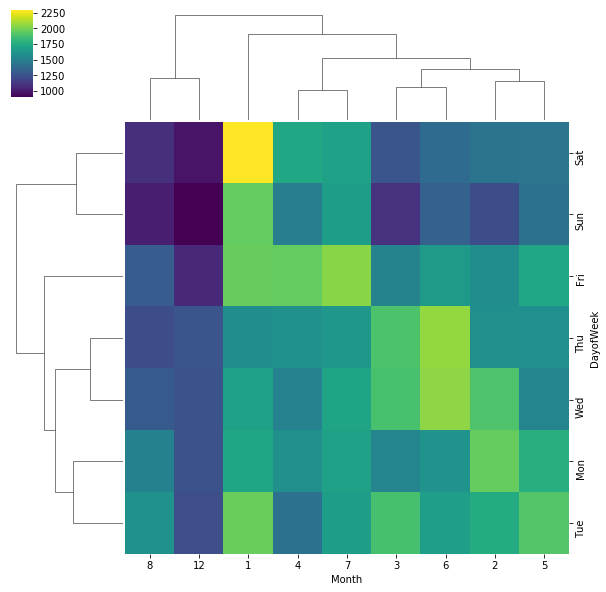

In [326]:
sns.clustermap(dayMonth,cmap='viridis')